In [1]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import copy
import torchvision.models as models
import torch
import torch.nn as nn
from torchvision import models
import torchvision
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.vision import *
from PIL import Image, ImageOps, ImageStat, ImageDraw
from torchvision import transforms
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import math
import time
import cv2


# Genereating Dataset

In [ ]:
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Basketball.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Biker.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Bird1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Bird2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurBody.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurCar1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurCar2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurCar3.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurCar4.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurFace.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/BlurOwl.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Board.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Bolt2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Bolt.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Box.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Boy.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Car1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Car24.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Car2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Car4.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/CarDark.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/CarScale.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/ClifBar.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Coke.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Couple.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Coupon.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Crossing.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Crowds.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Dancer2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Dancer.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/David2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/David3.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Deer.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Diving.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Dog1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Dog.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Doll.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/DragonBaby.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Dudek.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/FaceOcc1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/FaceOcc2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Fish.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/FleetFace.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Freeman1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Girl2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Girl.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Gym.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human3.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human4.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human5.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human6.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human7.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human8.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Human9.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Ironman.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Jumping.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Jump.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/KiteSurf.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Lemming.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Liquor.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Man.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Matrix.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Mhyang.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/MotorRolling.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/MountainBike.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Panda.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/RedTeam.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Rubik.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Shaking.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Singer1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Singer2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Skater2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Skater.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Skating1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Skiing.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Soccer.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Subway.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Surfer.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Suv.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Sylvester.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Tiger1.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Tiger2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Toy.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Trans.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Trellis.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Twinnings.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Vase.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Walking2.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Walking.zip
! wget http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Woman.zip

! unzip Basketball.zip
! unzip Biker.zip
! unzip Bird1.zip
! unzip Bird2.zip
! unzip BlurBody.zip
! unzip BlurCar1.zip
! unzip BlurCar2.zip
! unzip BlurCar3.zip
! unzip BlurCar4.zip
! unzip BlurFace.zip
! unzip BlurOwl.zip
! unzip Board.zip
! unzip Bolt2.zip
! unzip Bolt.zip
! unzip Box.zip
! unzip Boy.zip
! unzip Car1.zip
! unzip Car24.zip
! unzip Car2.zip
! unzip Car4.zip
! unzip CarDark.zip
! unzip CarScale.zip
! unzip ClifBar.zip
! unzip Coke.zip
! unzip Couple.zip
! unzip Coupon.zip
! unzip Crossing.zip
! unzip Crowds.zip
! unzip Dancer2.zip
! unzip Dancer.zip
! unzip David2.zip
! unzip David3.zip
! unzip Deer.zip
! unzip Diving.zip
! unzip Dog1.zip
! unzip Dog.zip
! unzip Doll.zip
! unzip DragonBaby.zip
! unzip Dudek.zip
! unzip FaceOcc1.zip
! unzip FaceOcc2.zip
! unzip Fish.zip
! unzip FleetFace.zip
! unzip Freeman1.zip
! unzip Girl2.zip
! unzip Girl.zip
! unzip Gym.zip
! unzip Human2.zip
! unzip Human3.zip
! unzip Human4.zip
! unzip Human5.zip
! unzip Human6.zip
! unzip Human7.zip
! unzip Human8.zip
! unzip Human9.zip
! unzip Ironman.zip
! unzip Jumping.zip
! unzip Jump.zip
! unzip KiteSurf.zip
! unzip Lemming.zip
! unzip Liquor.zip
! unzip Man.zip
! unzip Matrix.zip
! unzip Mhyang.zip
! unzip MotorRolling.zip
! unzip MountainBike.zip
! unzip Panda.zip
! unzip RedTeam.zip
! unzip Rubik.zip
! unzip Shaking.zip
! unzip Singer1.zip
! unzip Singer2.zip
! unzip Skater2.zip
! unzip Skater.zip
! unzip Skating1.zip
! unzip Skiing.zip
! unzip Soccer.zip
! unzip Subway.zip
! unzip Surfer.zip
! unzip Suv.zip
! unzip Sylvester.zip
! unzip Tiger1.zip
! unzip Tiger2.zip
! unzip Toy.zip
! unzip Trans.zip
! unzip Trellis.zip
! unzip Twinnings.zip
! unzip Vase.zip
! unzip Walking2.zip
! unzip Walking.zip
! unzip Woman.zip


--2021-05-16 10:45:41--  http://cvlab.hanyang.ac.kr/tracker_benchmark/seq/Basketball.zip
Resolving cvlab.hanyang.ac.kr (cvlab.hanyang.ac.kr)... 166.104.145.23
Connecting to cvlab.hanyang.ac.kr (cvlab.hanyang.ac.kr)|166.104.145.23|:80... 

to set same separator ',' for all the groundtruth_rect.txt, I created a new file, groundtruth_rect_new.txt, so that reading in df will be easy. I removed the videos which have multiple groundtruth_rect.txt files, and also some 2 3 frames which have bb as 0 0 0 0 .


In [4]:
bboxes_xywh_dict = {}
# removed human4,
for i in ['Basketball','Biker','Bird1','Bird2','BlurBody','BlurCar1','BlurCar2','BlurCar3','BlurCar4',\
          'BlurFace','BlurOwl','Board','Bolt2','Bolt','Box','Boy','Car1','Car24','Car2','Car4','CarDark',\
          'CarScale','ClifBar','Coke','Couple','Coupon','Crossing','Crowds','Dancer2','Dancer','David2',\
          'David3','Deer','Diving','Dog1','Dog','Doll','DragonBaby','Dudek','FaceOcc1','FaceOcc2','Fish',\
          'FleetFace','Freeman1','Girl2','Girl','Gym','Human2','Human3','Human5','Human6','Human7',\
          'Human8','Human9','Ironman','Jumping','Jump','KiteSurf','Lemming','Liquor','Man','Matrix','Mhyang',\
          'MotorRolling','MountainBike','Panda','RedTeam','Rubik','Shaking','Singer1','Singer2','Skater2',\
          'Skater','Skating1','Skiing','Soccer','Subway','Surfer','Suv','Sylvester','Tiger1','Tiger2','Toy',\
          'Trans','Trellis','Twinnings','Vase','Walking2','Walking','Woman']:
    
    df = pd.read_csv(i+'/groundtruth_rect_new.txt', header=None, sep=',')
    bboxes_xywh_dict[i] = torch.Tensor(df.values).tolist()

In [5]:
all_images_dict = {}

for folder in ['Basketball','Biker','Bird1','Bird2','BlurBody','BlurCar1','BlurCar2','BlurCar3','BlurCar4',\
          'BlurFace','BlurOwl','Board','Bolt2','Bolt','Box','Boy','Car1','Car24','Car2','Car4','CarDark',\
          'CarScale','ClifBar','Coke','Couple','Coupon','Crossing','Crowds','Dancer2','Dancer','David2',\
          'David3','Deer','Diving','Dog1','Dog','Doll','DragonBaby','Dudek','FaceOcc1','FaceOcc2','Fish',\
          'FleetFace','Freeman1','Girl2','Girl','Gym','Human2','Human3','Human5','Human6','Human7',\
          'Human8','Human9','Ironman','Jumping','Jump','KiteSurf','Lemming','Liquor','Man','Matrix','Mhyang',\
          'MotorRolling','MountainBike','Panda','RedTeam','Rubik','Shaking','Singer1','Singer2','Skater2',\
          'Skater','Skating1','Skiing','Soccer','Subway','Surfer','Suv','Sylvester','Tiger1','Tiger2','Toy',\
          'Trans','Trellis','Twinnings','Vase','Walking2','Walking','Woman']:

    lol = pd.read_csv(folder + '/img_files', header=None, sep=',').values.tolist()
    flat_list = [item for sublist in lol for item in sublist]
    all_images = []
        
    for img_file in flat_list:
        all_images.append(folder+'/img/'+img_file)
    all_images_dict[folder] = all_images

In [6]:
folders = ['Basketball','Biker','Bird1','Bird2','BlurBody','BlurCar1','BlurCar2','BlurCar3','BlurCar4',\
          'BlurFace','BlurOwl','Board','Bolt2','Bolt','Box','Boy','Car1','Car24','Car2','Car4','CarDark',\
          'CarScale','ClifBar','Coke','Couple','Coupon','Crossing','Crowds','Dancer2','Dancer','David2',\
          'David3','Deer','Dog1','Dog','Doll','DragonBaby','Dudek','FaceOcc1','FaceOcc2','Fish',\
          'FleetFace','Freeman1','Girl2','Girl','Gym','Human2','Human3','Human5','Human6','Human7',\
          'Human8','Human9','Ironman','Jumping','Jump','KiteSurf','Lemming','Liquor','Man','Matrix','Mhyang',\
          'MotorRolling','MountainBike','Panda','RedTeam','Rubik','Shaking','Singer1','Singer2','Skater2',\
          'Skater','Skating1','Skiing','Soccer','Subway','Surfer','Suv','Sylvester','Tiger1','Tiger2','Toy',\
          'Trans','Trellis','Twinnings','Vase','Walking2','Walking','Woman']

folders_val = ['Vase', 'BlurFace', 'Coke','Toy','DragonBaby','David2','FaceOcc1','Surfer']
folders_tr = list(set(folders) - set(folders_val))

these val videos I have selected randomly for once, and then kept them fixed thereafter, so that could compare
different models on the same train, val split

In [28]:
len(folders_tr),len(folders_val),len(folders)

(81, 8, 89)

# Util functions, Loss function, Dataset, Model


In [40]:
# some of the util functions are adapted from https://github.com/songdejia/Siamese-RPN-pytorch.

# gives bb in lxywh format
class Pairs_zx_Dataset_new(Dataset):
    def __init__(self, all_images_z, all_images_x, all_bboxes_z, all_bboxes_x, all_gaps, use_aug=False, factor=0.5):
        self.images_list_z = all_images_z
        self.images_list_x = all_images_x
        self.bbox_list_z = all_bboxes_z
        self.bbox_list_x = all_bboxes_x
        self.all_gaps = all_gaps
        self.w, self.h = 287,287
        self.use_aug = use_aug
        self.factor=factor

        self.transform = transforms.Compose([   
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                            ])
        
    def __len__(self):
        return len(self.images_list_z)
      

    def __getitem__(self, index):
        #xyxy format
        x_img_crop_resized, z_img_crop_resized, cords_in_cropped_resized_detection = self.pad_crop(index)
        
        if self.use_aug==True:
            bbx,bby,bbx1,bby1 = cords_in_cropped_resized_detection   #xyxy format
            bbw,bbh = bbx1-bbx, bby1-bby
            bbx,bby,bbw,bbh = int(bbx),int(bby),int(bbw),int(bbh)
            
            torch.random.manual_seed(index)
            tx = torch.randint(-bbx, self.w-bbx-bbw, (1,))*self.factor
            torch.random.manual_seed(index)
            ty = torch.randint(-bby, self.h-bby-bbh, (1,))*self.factor
            cords_in_cropped_resized_detection = [bbx+tx, bby+ty, bbx1+tx, bby1+ty]
            # print(tx,ty)        
            fill_color = tuple((transforms.ToTensor()(x_img_crop_resized).mean(dim=(1,2))*255).to(int).tolist())
            x_img_crop_resized = torchvision.transforms.functional.affine(x_img_crop_resized, 0, translate=(tx,ty), scale=1, shear=0, fillcolor=fill_color)
        
        return self.transform(x_img_crop_resized), self.transform(z_img_crop_resized), cords_in_cropped_resized_detection, index, self.all_gaps[index]
        

    def pad_crop(self, index):
        x_img = Image.open(self.images_list_x[index]).convert('RGB')
        x_bb = np.array(self.bbox_list_x[index])
        # print("in ds, pad_crop", x_bb)

        
        z_img = Image.open(self.images_list_z[index]).convert('RGB')
        z_bb = np.array(self.bbox_list_z[index])
        
        z_w, z_h = z_img.size

        z_cx, z_cy, z_bb_w, z_bb_h = z_bb[0] + z_bb[2]/2., z_bb[1] + z_bb[3]/2., z_bb[2], z_bb[3]

        p = (z_bb_w + z_bb_h)/2.
        
        template_square_size  = int(np.sqrt((z_bb_w + p)*(z_bb_h + p)))
        detection_square_size = int(template_square_size * 2)
        
        # pad
        detection_lt_x, detection_lt_y = z_cx - detection_square_size//2, z_cy - detection_square_size//2
        detection_rb_x, detection_rb_y = z_cx + detection_square_size//2, z_cy + detection_square_size//2
        left   = -detection_lt_x if detection_lt_x < 0 else 0
        top    = -detection_lt_y if detection_lt_y < 0 else 0
        right  =  detection_rb_x - z_w if detection_rb_x > z_w else 0
        bottom =  detection_rb_y - z_h if detection_rb_y > z_h else 0
        padding = (int(left), int(top), int(right), int(bottom))
        # print("padding", padding)

        z_img_pad = ImageOps.expand(z_img, border=padding, fill=tuple((transforms.ToTensor()(z_img).mean(dim=(1,2))*255).to(int).tolist()))        
        x_img_pad = ImageOps.expand(x_img, border=padding, fill=tuple((transforms.ToTensor()(x_img).mean(dim=(1,2))*255).to(int).tolist()))
        new_w, new_h = left + right + z_w, top + bottom + z_h

        # crop part
        ## template part
        tl = z_cx + left - template_square_size//2
        tt = z_cy + top  - template_square_size//2
        tr = new_w - tl - template_square_size
        tb = new_h - tt - template_square_size
        z_img_crop = ImageOps.crop(z_img_pad, (tl, tt, tr, tb))
        
        
        ## detection part
        dl = np.clip(z_cx + left - detection_square_size//2, 0, new_w - detection_square_size)
        dt = np.clip(z_cy + top  - detection_square_size//2, 0, new_h - detection_square_size)
        dr = np.clip(new_w - dl - detection_square_size, 0, new_w - detection_square_size)
        db = np.clip(new_h - dt - detection_square_size, 0, new_h - detection_square_size)
        x_img_crop = ImageOps.crop(x_img_pad,(dl, dt, dr, db))
        
        
        det_tl_orig = (z_cx - detection_square_size//2 , z_cy - detection_square_size//2)
        det_tl_pad  = (z_cx - detection_square_size//2 + left, z_cy - detection_square_size//2 + top)
        det_rb_pad  = (z_cx + detection_square_size//2 + left, z_cy + detection_square_size//2 + top)
        
        template_output_sz = 159
        detection_output_sz = 287

        z_img_crop_resized = z_img_crop.copy().resize((template_output_sz, template_output_sz))
        x_img_crop_resized = x_img_crop.copy().resize((detection_output_sz, detection_output_sz))
        
        z_crop_resize_ratio = round(template_output_sz/template_square_size, 2)
        x_crop_resize_ratio = round(detection_output_sz/detection_square_size, 2)

        x, y, w, h = x_bb[0]+x_bb[2]/2., x_bb[1]+x_bb[3]/2., x_bb[2], x_bb[3]
        # print("in ds,padcrop 2",x,y,w,h)
        

        x11, y11 = det_tl_pad
        x12, y12 = det_rb_pad
        x21, y21 = (x+left-w//2, y+top-h//2)
        x22, y22 = (x+left+w//2, y+top+h//2)
        # x21, y21 = (x+left, y+top)
        # x22, y22 = (x+left, y+top)
        

        x1_of_d = x21 - x11
        y1_of_d = y21 - y11
        x3_of_d = x22 - x11
        y3_of_d = y22 - y11

        x1 = np.clip(x1_of_d, 0, x12-x11).astype(np.int32)
        y1 = np.clip(y1_of_d, 0, y12-y11).astype(np.int32)
        x2 = np.clip(x3_of_d, 0, x12-x11).astype(np.int32)
        y2 = np.clip(y3_of_d, 0, y12-y11).astype(np.int32)
        
        cords_in_cropped_detection = np.array((x1, y1, x2, y2))
        # print(x_crop_resize_ratio)
        # print(cords_in_cropped_detection)
        # print((cords_in_cropped_detection * x_crop_resize_ratio))
        cords_in_cropped_resized_detection = (cords_in_cropped_detection * x_crop_resize_ratio).astype(np.int32)

        return x_img_crop_resized, z_img_crop_resized, cords_in_cropped_resized_detection
        

def collate_fn_new(batch):
    images = []
    bboxes = []
    z = []
    indices = []
    gaps = []

    for b in batch:
        images.append(b[0])
        z.append(b[1])
        bboxes.append(torch.tensor(b[2]))
        indices.append(b[3])
        gaps.append(b[4])

    standardized_bboxes = torch.stack(bboxes, dim=0)
    scaling_factor = 1.
    return torch.stack(images, dim=0)/scaling_factor, torch.stack(z, dim=0)/scaling_factor, xyxy_to_lxywh(standardized_bboxes), indices, gaps


def get_img_sz(img_path):
    im = Image.open(img_path)
    return im.size


def denormalize__(input):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return np.multiply(std,input) + mean






















class VOT_baseline(nn.Module):
    def __init__(self):
        super().__init__()
        use_cuda = torch.cuda.is_available()  # check if GPU exists
        self.device = torch.device("cuda" if use_cuda else "cpu")  # use CPU or GPU
        self.k = 5
        self.c1 = self.conv2d(256, 256*2*self.k, kernel=3, stride = 1, padding = 1)
        self.c2 = self.conv2d(256, 256, kernel=3, stride = 1, padding = 1)
        self.c3 = self.conv2d_reg(256, 256*4*self.k, kernel=3, stride = 1, padding = 1)
        self.c4 = self.conv2d_reg(256, 256, kernel=3, stride = 1, padding = 1)
        self.bn_reg = nn.BatchNorm2d(4*self.k).to(device)
        self.bn_cl = nn.BatchNorm2d(2*self.k).to(device)


        self.phi = nn.Sequential(
                                  nn.Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=0),
                                  nn.ReLU(inplace=True),
                                  nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
                                  nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=0),
                                  nn.ReLU(inplace=True),
                                  # nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
                                  nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=0),
                                  nn.ReLU(inplace=True),
                                  nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=0),
                                  nn.ReLU(inplace=True),
                                  nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=0),
                                  # nn.ReLU(inplace=True),
                                  # nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
                                ).to(device)
        # dictt = {}
        # for idx, n in enumerate(self.phi.state_dict()):
        #     dictt[n] = alexnet.state_dict()[alexnet_statedict_keys[idx]]
        
        # self.phi.load_state_dict(dictt)


    def conv2d(self, in_channels, out_channels, kernel=1, stride=1, padding=0):
        conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel, stride=stride, padding=padding)
        self.initialize(conv)
        return nn.Sequential(
            conv,
            # nn.BatchNorm2d(out_channels),
            # nn.ReLU(),
#             nn.Dropout2d(p=0.1),
        ).to(self.device)

    def conv2d_reg(self, in_channels, out_channels, kernel=1, stride=1, padding=0):
        conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel, stride=stride, padding=padding)
        self.initialize(conv)
        return nn.Sequential(
            conv,
            # nn.BatchNorm2d(out_channels),
            # nn.ReLU(),
#             nn.Dropout2d(p=0.1),
        ).to(self.device)

    def initialize(self, c):
        nn.init.xavier_normal_(c.weight.data, 0.02)
        nn.init.constant_(c.bias.data, 0.)

    def compute_phi(self, x):
        return self.phi(x)

    def forward(self, x, z):
        """

        :param x: shape (bs, 3, 300, 300)
        :param z: shape (bs, 3, 150, 150)
        :return:
        """
        phi_z = self.phi(z)                         #torch.Size([3, 256, 4, 4])
        phi_x = self.phi(x)                         #torch.Size([3, 256, 20, 20])

        bs = x.shape[0]
        
        c1 = self.c1(phi_z)                         #torch.Size([3, 2560, 4, 4])

        c1 = c1.view(bs, 2*self.k, 256, 8, 8)       #torch.Size([3, 10, 256, 4, 4])

        c2 = self.c2(phi_x)                         #torch.Size([3, 256, 20, 20])

        c3 = self.c3(phi_z)                         #torch.Size([3, 5120, 4, 4])
        c3 = c3.view(bs, 4*self.k, 256, 8, 8)       #torch.Size([3, 20, 256, 4, 4])

        c4 = self.c4(phi_x)                         #torch.Size([3, 256, 20, 20])
        
        
        convolved_cls = torch.stack([F.conv2d(c2[b].unsqueeze(0), c1[b]) for b in range(bs)]).squeeze(1)

        convolved_reg = torch.stack([F.conv2d(c4[b].unsqueeze(0), c3[b]) for b in range(bs)]).squeeze(1)

        convolved_cls = convolved_cls.permute(0, 2, 3, 1).contiguous().view(bs, -1, 2)
        
        convolved_reg = convolved_reg.permute(0, 2, 3, 1).contiguous().view(bs, -1, 4)

        return convolved_cls, convolved_reg



use_cuda = torch.cuda.is_available()  # check if GPU exists
device = torch.device("cuda" if use_cuda else "cpu")  # use CPU or GPU




detection_size = 287


def create_priors_ssd300_cxywh():

    print("-----------------------create priors-------------------")
    anc_grids = [17]

    scales = [64]

    anc_ratios = [[1., 2., 3., 0.5, .333]
                  ]
    priors = []
    stride = 8
    for idx, anc_grid in enumerate(anc_grids):
        for i in range(int(anc_grid)):
            for j in range(int(anc_grid)):
                # cx, cy = ((stride-1)//2), ((stride-1)//2)
                cx, cy = 159//2, 159//2
                for a in anc_ratios[idx]:
                    priors.append([ cy+j*stride, cx+i*stride, scales[idx] * math.sqrt(a), scales[idx] / math.sqrt(a)])
                    
    priors = torch.FloatTensor(priors)
    return priors

def xyxy_to_cxywh(anchors):
    x1 = anchors[:, 0].cpu()
    y1 = anchors[:, 1].cpu()
    x2 = anchors[:, 2].cpu()
    y2 = anchors[:, 3].cpu()

    return torch.Tensor(np.stack( ( (x2 + x1)/2., (y2 + y1)/2., x2-x1, y2-y1), axis=1))

def cxywh_to_xyxy(box):
    x_y = box[:, :2]
    w_h = box[:, 2:]
    return torch.cat((x_y - w_h / 2., x_y + w_h / 2.), dim=1)

def lxywh_to_xyxy(box):
    x_y = box[:, :2]
    w_h = box[:, 2:]
    return torch.cat((x_y, x_y + w_h), dim=1)

def xyxy_to_lxywh_single(box):
    lx_y = box[:2]
    w_h = box[2:]-box[:2] 
    return torch.cat((lx_y, w_h))

def xyxy_to_lxywh(box):
    lx_y = box[:, :2]
    w_h = box[:, 2:] - box[:, :2] 
    return torch.cat((lx_y, w_h), dim=1)

def lxywh_to_cxywh(box):
    lx_y = box[:, :2]
    w_h = box[:, 2:]
    return torch.cat((lx_y + w_h/2.0, w_h), dim=1)

def get_jaccard_tensor1(box1_xyxy, box2_xyxy):
    intersection = find_intersection(box1_xyxy, box2_xyxy)  # (n1, n2)
    areas_set_1 = (box1_xyxy[:, 2] - box1_xyxy[:, 0]) * (box1_xyxy[:, 3] - box1_xyxy[:, 1])  # (n1)
    areas_set_2 = (box2_xyxy[:, 2] - box2_xyxy[:, 0]) * (box2_xyxy[:, 3] - box2_xyxy[:, 1])  # (n2)

    union = areas_set_1.unsqueeze(1) + areas_set_2.unsqueeze(0) - intersection  # (n1, n2)

    return intersection / union  # (n1, n2)

def find_intersection(set_1, set_2):
    lower_bounds = torch.max(set_1[:, :2].unsqueeze(1), set_2[:, :2].unsqueeze(0))  # (n1, n2, 2)
    upper_bounds = torch.min(set_1[:, 2:].unsqueeze(1), set_2[:, 2:].unsqueeze(0))  # (n1, n2, 2)
    intersection_dims = torch.clamp(upper_bounds - lower_bounds, min=0)  # (n1, n2, 2)
    return intersection_dims[:, :, 0] * intersection_dims[:, :, 1]  # (n1, n2)

def get_offsets_coords(cxcy, priors_cxcy):
    cxcy = cxcy.to(device)
    priors_cxcy = priors_cxcy.to(device)
    return torch.cat([(cxcy[:, :2] - priors_cxcy[:, :2]) / (priors_cxcy[:, 2:]),  # g_c_x, g_c_y
                      torch.log(cxcy[:, 2:] / priors_cxcy[:, 2:])], 1)  # g_w, g_h

def gcxgcy_to_cxcy(gcxgcy, priors_cxcy):
    return torch.cat([gcxgcy[:, :2] * priors_cxcy[:, 2:] + priors_cxcy[:, :2],  # c_x, c_y
                      torch.exp(gcxgcy[:, 2:]) * priors_cxcy[:, 2:]], 1)  # w, h


def get_samples(mask, n_samples):
    pdf = mask.float()/mask.sum()
    return torch.multinomial(pdf, n_samples)







ancs_cxywh = create_priors_ssd300_cxywh().to(device)

ancs_xyxy = cxywh_to_xyxy(create_priors_ssd300_cxywh()).to(device)

def ssd(outputs, tr_bboxs, x):
    """
    :param outputs: (bs, 8732, 4), (bs, 8732, 21)
    :param tr_classes:
    :param tr_bboxs:
    :param tr_indxs:
    :return:
    """
    bs = len(tr_bboxs)
    lbb = 0.0
    lc = 0.0
    pred_class_scores, pred_bb_offsets = outputs

    for pred_bb_offset, pred_class_score, tr_bbox, x_ in zip(pred_bb_offsets, pred_class_scores, tr_bboxs, x):
        lc_, lbb_ = ssd1(pred_bb_offset, pred_class_score, tr_bbox.unsqueeze(0).float(), x_)
        lbb += lbb_
        lc += lc_

    return lc/bs, lbb/bs


def ssd1(pred_bb_offset, pred_class_score, tr_bbox, x,  print_flag=False):
    """
    :param pred_bb_offset: (8732,4)
    :param pred_class_score: (8732,21)
    :param tr_bbox:
    :return:
    """
    
    smooth_l1 = nn.L1Loss()    

    jacc = get_jaccard_tensor1(lxywh_to_xyxy(tr_bbox), ancs_xyxy) # (1,8732)    
    neg_mask, pos_mask = map_prior_to_bb(jacc)

    n_pos = pos_mask.sum()


    pos_mask_samples = get_samples(pos_mask, n_pos)
    neg_mask_samples = get_samples(neg_mask, 3*n_pos)
    
    gt_prob = pos_mask.long()

    cce = F.cross_entropy(pred_class_score.to(device), gt_prob, reduce=False)

    c_loss = (cce[pos_mask_samples].sum() + cce[neg_mask_samples].sum())/n_pos
    # need of hnm is because most of the priors don;t have any obj, which can lead to a model which is trained to detect bg, rather than
    # object. To balance this problem what can we do is we can find out the anchors where model was sure its not bg, but gt was bg,
    # i.e those anchors where model detect bg poorly and we can include those anchors' cce in the loss.
    # the combined effect is model is trained to find objects and also trained to differentiate whether bg or not.

    offsets = get_offsets_coords(lxywh_to_cxywh(torch.repeat_interleave(tr_bbox, ancs_xyxy.shape[0], dim=0)), ancs_cxywh)
  
    loc_loss = smooth_l1(pred_bb_offset[pos_mask_samples], offsets[pos_mask_samples])
    
    return c_loss, loc_loss


def map_prior_to_bb(jacc, threshold=0.5):
    jacc = jacc.to(device)
    # for each prior the object it has max overlap with, axis=0 means along x axis, i.e. along total_priors
    overlap_forEach_prior, _ = jacc.max(axis=0)  # (189), (189)
    overlap_forEach_prior = overlap_forEach_prior.to(device)

    # for each obj, the value of overlap, prior it has max overlap with, axis=1 means along y axis, i.e. along n_objects
    _, prior_forEach_obj = jacc.max(axis=1)  #(1,)
    prior_forEach_obj = prior_forEach_obj.to(device)

    overlap_forEach_prior[prior_forEach_obj] = 1.
    
    neg_mask = (overlap_forEach_prior < 0.2)
    pos_mask = (overlap_forEach_prior >= 0.4)

    return neg_mask, pos_mask



def draw_pos_neg_from_ancs(x, bb_gt):
    bb_gt = bb_gt.unsqueeze(0).float()

    jacc = get_jaccard_tensor1(lxywh_to_xyxy(bb_gt), ancs_xyxy) # (1,8732)
    
    neg_mask, pos_mask = map_prior_to_bb(jacc)
    jacc,indices = torch.sort(jacc, descending=True)

    n_pos = 0
    if pos_mask.sum()>=16:
      pos_mask_samples = get_samples(pos_mask, 16)
      n_pos = 16
    else:
      pos_mask_samples = get_samples(pos_mask, pos_mask.sum())
      n_pos = pos_mask.sum()

    neg_mask_samples = get_samples(neg_mask, 64 - n_pos)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(denormalize__((x).permute(1,2,0).detach().cpu()))
    bb_gt = bb_gt[0]

    rect = patches.Rectangle((bb_gt[0]*1, bb_gt[1]*1), bb_gt[2]*1, bb_gt[3]*1, linewidth=3,
                              edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    print(n_pos)
    for bb in ancs_cxywh[pos_mask_samples]*1:
        
        rect = patches.Rectangle((bb[0]-bb[2]/2., bb[1]-bb[3]/2.), bb[2], bb[3], linewidth=1,
                              edgecolor='white', facecolor='none')
        ax.add_patch(rect)

    for bb in ancs_cxywh[neg_mask_samples]*1:
        
        rect = patches.Rectangle((bb[0]-bb[2]/2., bb[1]-bb[3]/2.), bb[2], bb[3], linewidth=1,
                              edgecolor='black', facecolor='none')
        ax.add_patch(rect)
    plt.show()




def draw_pos_neg_from_preds(o, x, bb_gt):
    pred_class_scores, _ = o                                      #torch.Size([1, 2000, 2]) torch.Size([1, 2000, 4])

    pred_class_scores = pred_class_scores.squeeze(0)
    
    positive_scores = pred_class_scores[:,1]
    positive_scores, indices = torch.sort(positive_scores, descending=True)
    bb_gt = bb_gt.float()
    
    k = 50
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(denormalize__((x).permute(1,2,0).detach().cpu()))

    rect = patches.Rectangle((bb_gt[0]*1, bb_gt[1]*1), bb_gt[2]*1, bb_gt[3]*1, linewidth=3,
                              edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    
    for bb in ancs_cxywh[indices[0:k]]*1:
        rect = patches.Rectangle((bb[0]-bb[2]/2., bb[1]-bb[3]/2.), bb[2], bb[3], linewidth=2,
                              edgecolor='white', facecolor='none')
        ax.add_patch(rect)
    plt.show()


def inference_1bs(o, x, bb_gt, z):
    bb_gt = bb_gt.float()
    pred_class_scores, pred_bb_offsets = o                                      #torch.Size([1, 2000, 2]) torch.Size([1, 2000, 4])
    pred_class_scores, pred_bb_offsets = pred_class_scores.squeeze(0), pred_bb_offsets.squeeze(0)
    
    positive_scores = pred_class_scores[:,1]

    positive_scores, indices = torch.sort(positive_scores, descending=True)

    all_bboxs_cxywh = gcxgcy_to_cxcy(pred_bb_offsets, ancs_cxywh).to(device)

    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(denormalize__((z).permute(1,2,0).detach().cpu()))
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(denormalize__((x).permute(1,2,0).detach().cpu()))
    bb = all_bboxs_cxywh[indices[0]]*1.
    
    rect = patches.Rectangle((bb[0]-bb[2]/2., bb[1]-bb[3]/2.), bb[2], bb[3], linewidth=3,
                              edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    
    rect = patches.Rectangle((bb_gt[0]*1., bb_gt[1]*1.), bb_gt[2]*1., bb_gt[3]*1., linewidth=3,
                              edgecolor='white', facecolor='none')
    ax.add_patch(rect)

    
    print("predicted offsets", pred_bb_offsets[indices[0]])
    print((ancs_cxywh[indices[0]]*1).tolist(), "--->", (all_bboxs_cxywh[indices[0]]*1.).tolist())
    bb = ancs_cxywh[indices[0]]*1
    rect = patches.Rectangle((bb[0]-bb[2]/2., bb[1]-bb[3]/2.), bb[2], bb[3], linewidth=3,
                              edgecolor='purple', facecolor='none')
    ax.add_patch(rect)
    plt.show()
    

-----------------------create priors-------------------
-----------------------create priors-------------------


In [23]:
class VOT_baseline_2(nn.Module):
    def __init__(self):
        super().__init__()
        use_cuda = torch.cuda.is_available()  # check if GPU exists
        self.device = torch.device("cuda" if use_cuda else "cpu")  # use CPU or GPU
        self.k = 5
        
#         self.c1 = nn.Conv2d(1, 256, kernel_size=3, stride = 1, padding = 1).to(device)
        self.c1 = self.conv2d(256, 256, kernel=3, stride = 1, padding = 1)
        self.c1_3 = self.conv2d(256, 1, kernel=1, stride = 1, padding = 0)
        self.c1_4 = self.conv2d(1, 2*self.k, kernel=1, stride = 1, padding = 0)
        
        
        
        self.c2 = self.conv2d(256, 256, kernel=3, stride = 1, padding = 1)
        
        
        self.c3 = self.conv2d(256, 256, kernel=3, stride = 1, padding = 1)
        
        self.c3_3 = self.conv2d(256, 1, kernel=1, stride = 1, padding = 0)
        self.c3_4 = self.conv2d(1, 4*self.k, kernel=1, stride = 1, padding = 0)
        
        self.c4 = self.conv2d_reg(256, 256, kernel=3, stride = 1, padding = 1)
        self.bn_reg = nn.BatchNorm2d(4*self.k).to(device)
        self.bn_cl = nn.BatchNorm2d(2*self.k).to(device)


        self.phi = nn.Sequential(
                                  nn.Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=0),
                                  nn.ReLU(inplace=True),
                                  nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
                                  nn.Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=0),
                                  nn.ReLU(inplace=True),
                                  # nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
                                  nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=0),
                                  nn.ReLU(inplace=True),
                                  nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=0),
                                  nn.ReLU(inplace=True),
                                  nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=0),
                                  # nn.ReLU(inplace=True),
                                  # nn.MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
                                ).to(device)
        # dictt = {}
        # for idx, n in enumerate(self.phi.state_dict()):
        #     dictt[n] = alexnet.state_dict()[alexnet_statedict_keys[idx]]
        
        # self.phi.load_state_dict(dictt)


    def conv2d(self, in_channels, out_channels, kernel=1, stride=1, padding=0):
        conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel, stride=stride, padding=padding)
        self.initialize(conv)
        return nn.Sequential(
            conv,
            nn.ReLU(),
            nn.BatchNorm2d(out_channels),
#             nn.ReLU(),
#             nn.Dropout2d(p=0.1),
        ).to(self.device)

    
    def conv2d_reg(self, in_channels, out_channels, kernel=1, stride=1, padding=0):
        conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel, stride=stride, padding=padding)
        self.initialize(conv)
        return nn.Sequential(
            conv,
            # nn.BatchNorm2d(out_channels),
            # nn.ReLU(),
#             nn.Dropout2d(p=0.1),
        ).to(self.device)


    def initialize(self, c):
        nn.init.xavier_normal_(c.weight.data, 0.02)
        nn.init.constant_(c.bias.data, 0.)

    def compute_phi(self, x):
        return self.phi(x)

    def forward(self, x, z):
        """

        :param x: shape (bs, 3, 300, 300)
        :param z: shape (bs, 3, 150, 150)
        :return:
        """
        # with torch.no_grad():
        phi_z = self.phi(z)               #torch.Size([3, 256, 4, 4])
        phi_x = self.phi(x)               #torch.Size([3, 256, 20, 20])

        bs = x.shape[0]
        
        c2 = self.c2(phi_x) 

        c1_1 = self.c1(phi_z)
        
        c1_3 = torch.stack([F.conv2d(c2[b].unsqueeze(0), c1_1[b].unsqueeze(0).permute(1,0,2,3),stride=1, padding=0, groups=256)\
                             for b in range(bs)]).squeeze(1)
                
        conv_cls = self.c1_4(self.c1_3(c1_3))

        
        c3_1 = self.c3(phi_z)
        
        c4 = self.c4(phi_x) 

        c3_3 = torch.stack([F.conv2d(c4[b].unsqueeze(0), c3_1[b].unsqueeze(0).permute(1,0,2,3),stride=1, padding=0, groups=256)\
                             for b in range(bs)]).squeeze(1)

        conv_reg = self.c3_4(self.c3_3(c3_3))
        
        convolved_cls = conv_cls.permute(0, 2, 3, 1).contiguous().view(bs, -1, 2)
        
        convolved_reg = conv_reg.permute(0, 2, 3, 1).contiguous().view(bs, -1, 4)

        return convolved_cls, convolved_reg


if size of bb as compare to size of image is very less, then choosing gap of 5 may move bb at frame+5 out.
5 is choosen randomly

In [24]:
all_images_tr = []
all_bboxes_xywh_tr = []
all_gaps_tr = []

all_images_val = []
all_bboxes_xywh_val = []
all_gaps_val = []
# removed diving

for folder in folders_tr:
  
  
  mean_dim = np.mean(get_img_sz(all_images_dict[folder][0]))
  mean_bb_sz = np.mean(bboxes_xywh_dict[folder][0][-2:])
  isGapOne = False
  print(mean_bb_sz/mean_dim, folder)
  if mean_bb_sz/mean_dim < .15:
      isGapOne = True
      print(folder)

  n = len(all_images_dict[folder])
  
  for i in range(n):
    if isGapOne==True: 
        gap=1
    else: 
        # gap = torch.randint(5, 15 +1, (1,))[0].item()
        gap = 5
    if i == n-gap: break
    # if gap + i > n-1: gap = torch.randint(1, n-1-i  +1, (1,))[0].item()
    all_images_tr.append(all_images_dict[folder][i])
    all_gaps_tr.append(gap)
    all_images_tr.append(all_images_dict[folder][i+gap])
    all_bboxes_xywh_tr.append(bboxes_xywh_dict[folder][i])
    all_bboxes_xywh_tr.append(bboxes_xywh_dict[folder][i+gap])
    

    
for folder in folders_val:
  
  
  mean_dim = np.mean(get_img_sz(all_images_dict[folder][0]))
  mean_bb_sz = np.mean(bboxes_xywh_dict[folder][0][-2:])
  isGapOne = False
  print(mean_bb_sz/mean_dim, folder)
  if mean_bb_sz/mean_dim < .15:
      isGapOne = True
      print(folder)

  n = len(all_images_dict[folder])
  
  for i in range(n):
    if isGapOne==True: 
        gap=1
    else: 
        # gap = torch.randint(5, 15 +1, (1,))[0].item()
        gap = 5
    if i == n-gap: break
    # if gap + i > n-1: gap = torch.randint(1, n-1-i  +1, (1,))[0].item()
    all_images_val.append(all_images_dict[folder][i])
    all_gaps_val.append(gap)
    all_images_val.append(all_images_dict[folder][i+gap])
    all_bboxes_xywh_val.append(bboxes_xywh_dict[folder][i])
    all_bboxes_xywh_val.append(bboxes_xywh_dict[folder][i+gap])

0.14492753623188406 Deer
Deer
0.09357798165137615 Panda
Panda
0.085 Freeman1
Freeman1
0.3862704918032787 Singer1
0.2526785714285714 Liquor
0.109375 Subway
Subway
0.21726190476190477 Walking2
0.1046875 Jumping
Jumping
0.3625 BlurBody
0.3233333333333333 Car4
0.25666666666666665 Dudek
0.055 Skiing
Skiing
0.375 Human2
0.3230240549828179 Dancer2
0.1705357142857143 Box
0.30178571428571427 Trellis
0.07663690476190477 Walking
Walking
0.06759259259259259 Crowds
Crowds
0.33125 Board
0.12857142857142856 BlurCar3
BlurCar3
0.20714285714285716 Car2
0.3392857142857143 Girl
0.23392857142857143 Suv
0.148 Soccer
Soccer
0.06517857142857143 Human6
Human6
0.23035714285714284 Twinnings
0.2732142857142857 Human7
0.13066666666666665 Bolt2
Bolt2
0.21607142857142858 Car1
0.19364754098360656 Singer2
0.18839285714285714 BlurCar1
0.12678571428571428 Bird2
Bird2
0.06875 Boy
Boy
0.2642857142857143 Fish
0.087 Bolt
Bolt
0.103515625 Ironman
Ironman
0.118 Skating1
Skating1
0.36254295532646047 Skater2
0.25535714285714284

In [25]:
# benefit of higher gap 
# 1, It makes model more robust, in the sense that if gap=1 then change of object in two consec frames is very less, 
# so weights regarding appearance of obj are less robust.
# 2, though iou will be less but still results will be better during inference.
# 3, it will also reduce center bias, although that could be reduced by aug as well.

In [26]:
all_images_z_tr = all_images_tr[::2]
all_images_x_tr = all_images_tr[1::2]
all_bboxes_xywh_z_tr = all_bboxes_xywh_tr[::2]
all_bboxes_xywh_x_tr = all_bboxes_xywh_tr[1::2]



all_images_z_val = all_images_val[::2]
all_images_x_val = all_images_val[1::2]
all_bboxes_xywh_z_val = all_bboxes_xywh_val[::2]
all_bboxes_xywh_x_val = all_bboxes_xywh_val[1::2]



In [29]:
# one more was there
#indx=52905
# all_images_x[indx], all_bboxes_xywh_x[indx]
# ('Twinnings/img/0472.jpg', [0, 0, 0, 0])

('Twinnings/img/0471.jpg', [127.0, 115.0, 73.0, 43.0])

In [27]:
sum=0
model = VOT_baseline()
for n,i in model.named_parameters():
    print(n, i.shape, i.numel())
    sum+=i.numel()

print("<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>")
print("total params ",sum)

c1.0.weight torch.Size([2560, 256, 3, 3]) 5898240
c1.0.bias torch.Size([2560]) 2560
c2.0.weight torch.Size([256, 256, 3, 3]) 589824
c2.0.bias torch.Size([256]) 256
c3.0.weight torch.Size([5120, 256, 3, 3]) 11796480
c3.0.bias torch.Size([5120]) 5120
c4.0.weight torch.Size([256, 256, 3, 3]) 589824
c4.0.bias torch.Size([256]) 256
bn_reg.weight torch.Size([20]) 20
bn_reg.bias torch.Size([20]) 20
bn_cl.weight torch.Size([10]) 10
bn_cl.bias torch.Size([10]) 10
phi.0.weight torch.Size([64, 3, 11, 11]) 23232
phi.0.bias torch.Size([64]) 64
phi.3.weight torch.Size([192, 64, 5, 5]) 307200
phi.3.bias torch.Size([192]) 192
phi.5.weight torch.Size([384, 192, 3, 3]) 663552
phi.5.bias torch.Size([384]) 384
phi.7.weight torch.Size([256, 384, 3, 3]) 884736
phi.7.bias torch.Size([256]) 256
phi.9.weight torch.Size([256, 256, 3, 3]) 589824
phi.9.bias torch.Size([256]) 256
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>
total params  21352316


In [28]:
sum=0
model = VOT_baseline_2()
for n,i in model.named_parameters():
    print(n, i.shape, i.numel())
    sum+=i.numel()

print("<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>")
print("total params ",sum)

c1.0.weight torch.Size([256, 256, 3, 3]) 589824
c1.0.bias torch.Size([256]) 256
c1.2.weight torch.Size([256]) 256
c1.2.bias torch.Size([256]) 256
c1_3.0.weight torch.Size([1, 256, 1, 1]) 256
c1_3.0.bias torch.Size([1]) 1
c1_3.2.weight torch.Size([1]) 1
c1_3.2.bias torch.Size([1]) 1
c1_4.0.weight torch.Size([10, 1, 1, 1]) 10
c1_4.0.bias torch.Size([10]) 10
c1_4.2.weight torch.Size([10]) 10
c1_4.2.bias torch.Size([10]) 10
c2.0.weight torch.Size([256, 256, 3, 3]) 589824
c2.0.bias torch.Size([256]) 256
c2.2.weight torch.Size([256]) 256
c2.2.bias torch.Size([256]) 256
c3.0.weight torch.Size([256, 256, 3, 3]) 589824
c3.0.bias torch.Size([256]) 256
c3.2.weight torch.Size([256]) 256
c3.2.bias torch.Size([256]) 256
c3_3.0.weight torch.Size([1, 256, 1, 1]) 256
c3_3.0.bias torch.Size([1]) 1
c3_3.2.weight torch.Size([1]) 1
c3_3.2.bias torch.Size([1]) 1
c3_4.0.weight torch.Size([20, 1, 1, 1]) 20
c3_4.0.bias torch.Size([20]) 20
c3_4.2.weight torch.Size([20]) 20
c3_4.2.bias torch.Size([20]) 20
c4.0.w

In [29]:
# there is huge reduction in number of parameters, but it's mean IOU was around 0.6 for val dataset, and around 0.7
# for tr dataset. Might need more training data and a deeper backbone and then it perform at par.

# Checking Dataset

In [30]:
def draw_image_with_ancs_lxywh(image_path, bboxes, index):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(Image.open(image_path).convert('RGB'))
    

    for idx, bbox in enumerate(bboxes):
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=3,
                                 edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    # fig.savefig('Girl_bbox/{:04d}.jpg'.format(index+1))
    # plt.show()

In [37]:
pairs_zx_Dataset = {}
dataset_sizes = {}
dataloader = {}

train_dataset = Pairs_zx_Dataset_new(all_images_z_tr,\
                                     all_images_x_tr,\
                                     all_bboxes_xywh_z_tr,\
                                     all_bboxes_xywh_x_tr,\
                                     all_gaps_tr,\
                                     use_aug=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


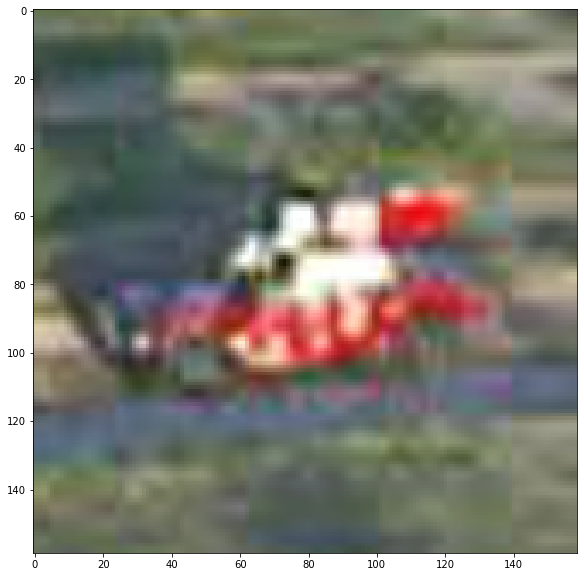

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


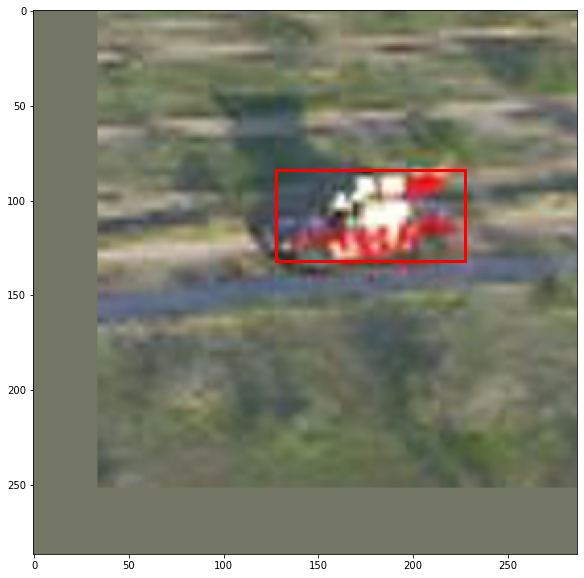

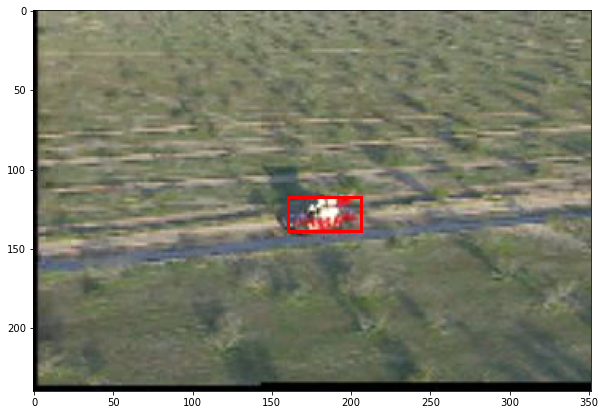

In [39]:
# x, z, bb, index, gap = next(iter(dataloader['train']))
# for x, z, bb, index, gap in dataloader['train']:

print(",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,")
for index in torch.randint(0, len(train_dataset), (1,)):

    x, z, bb, index, gap = train_dataset[index]

    # x, z, bb, index, gap = x[0], z[0], bb[0], index[0], gap[0]
    fig, ax = plt.subplots(figsize=(10,10))
    plt.imshow(denormalize__(z.permute(1,2,0)))
    plt.show()

    fig, ax = plt.subplots(figsize=(10,10))
    plt.imshow(denormalize__(x.permute(1,2,0)))
    for idx, bbox in enumerate(torch.Tensor(bb).unsqueeze(0)):
        # print((bbox[0], bbox[1]), bbox[2], bbox[3])
        print(gap)
        # rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=3,
        #                           edgecolor='red', facecolor='none')
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=3,
                                  edgecolor='red', facecolor='none')
        ax.add_patch(rect)
    plt.show()
    draw_image_with_ancs_lxywh(all_images_x_tr[index], torch.Tensor(all_bboxes_xywh_x_tr[index]).unsqueeze(0), 10)
    # print(idx)

# Training

In [131]:
pairs_zx_Dataset = {}
dataset_sizes = {}
dataloader = {}

n = len(all_images_x_tr)
indices=random.sample(range(len(all_images_x_tr)), n)
train_dataset = Pairs_zx_Dataset_new([all_images_z_tr[i] for i in indices],\
                                     [all_images_x_tr[i] for i in indices],\
                                     [all_bboxes_xywh_z_tr[i] for i in indices],\
                                     [all_bboxes_xywh_x_tr[i] for i in indices],\
                                     [all_gaps_tr[i] for i in indices],\
                                     use_aug=True)

n = len(all_images_x_val)
indices=random.sample(range(len(all_images_x_val)), n)
val_dataset = Pairs_zx_Dataset_new([all_images_z_val[i] for i in indices],\
                                     [all_images_x_val[i] for i in indices],\
                                     [all_bboxes_xywh_z_val[i] for i in indices],\
                                     [all_bboxes_xywh_x_val[i] for i in indices],\
                                     [all_gaps_val[i] for i in indices],\
                                     use_aug=True)


datasetDict = {"train": train_dataset, "val":val_dataset}

dataset_sizes = {x: len(datasetDict[x]) for x in ['train', 'val']}

dataloader = {x: DataLoader(datasetDict[x], batch_size=30,
                        shuffle=True, num_workers=4, pin_memory=True, collate_fn = collate_fn_new) for x in ['train', 'val']}


In [41]:
cnn = VOT_baseline().to(device)

biases = list()
not_biases = list()
for param_name, param in cnn.named_parameters():
    if param.requires_grad:
        if param_name.endswith('.bias'):
            biases.append(param)
        else:
            not_biases.append(param)

lr = 1e-4
optimizer = torch.optim.SGD(params=[{'params': biases, 'lr': lr}, {'params': not_biases}],
                            lr=lr, momentum=0.9, weight_decay=5e-3)


scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
train_model(cnn, optimizer, scheduler, dataloader, dataset_sizes, device, loadModel=True, num_epochs=1000)

In [17]:

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

counter=0
def train_model(cnn, optimizer, scheduler, dataloader, dataset_sizes, device, loadModel=False, num_epochs=200):
    since = time.time()
    global counter
    lbb = []
    lc = []
    epoch_losses = {}
    epoch_losses_cl = {}
    epoch_losses_reg = {}
    epoch_losses_iou_mean = {}


    for k in ['train', 'val']:
        epoch_losses[k] = []
        epoch_losses_cl[k] = []
        epoch_losses_reg[k] = []
        epoch_losses_iou_mean[k] = []



    epoch = 0
    lr = get_lr(optimizer)
    OLD_PATH = 'vot_baseline_'+str(counter)

    print(OLD_PATH)
    if loadModel == True:
        checkpoint = torch.load(OLD_PATH)
        cnn.load_state_dict(checkpoint['cnn_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        epoch = checkpoint['epoch']+1
        loss = checkpoint['loss']
        cnn = cnn.to(device)
        epoch_losses = checkpoint['epoch_losses']
        epoch_losses_cl = checkpoint['epoch_losses_cl']
        epoch_losses_reg = checkpoint['epoch_losses_reg']
        epoch_losses_iou_mean = checkpoint['epoch_losses_iou_mean']
    

    for epoch in range(epoch, num_epochs):
        epoch_b = time.time()
        counter = counter+1
        PATH = 'vot_baseline_'+str(counter)
        print(PATH)
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            cnn = cnn.to(device)
            if phase == 'train':
                cnn.train()  # Set model to training mode
            else:
                cnn.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_loss_cl = 0.0
            running_loss_reg = 0.0

            # Iterate over data.
            count = 0
            iteration = -1
            for x, z, bboxes, indices, gaps in dataloader[phase]:

                iteration+=1
                it_begin = time.time()
            

                x = x.to(device)
                z = z.to(device)
                
                bboxes = [b.to(device) for b in bboxes]
                
                bs = x.shape[0]

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = cnn(x,z)

                    losscl, lossreg = ssd(outputs, bboxes, x)

                    loss = losscl + 10.*lossreg
                    if iteration%1200==10 and epoch%2==0:
                        print("epoch ", epoch, ",  loss ", loss)

                    if iteration%50000==5: 
                    # and epoch%2==0:
                        if phase=='train':
                            cnn.eval()
                        r = torch.randint(0, 20,(1,))[0]
#                         .item()
                        o = cnn(x[r].unsqueeze(0), z[r].unsqueeze(0))
                        print("gap is ", gaps[r])
                        
                        inference_1bs(o, x[r], bboxes[r], z[r])
                        draw_pos_neg_from_preds(o, x[r], bboxes[r])
                        draw_pos_neg_from_ancs(x[r], bboxes[r])
                        
                        if phase=='train':
                            cnn.train()

                    lbb.append(lossreg)
                    lc.append(losscl)
                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss * x.size(0)
                running_loss_cl += losscl * x.size(0)
                running_loss_reg += lossreg * x.size(0)
#                 .item()

                if count % 20 == 0:
                    te = time.time() - it_begin
                    print("IIterated over ", count, "LR=", get_lr(optimizer),
                          'Iteration Completed in {:.0f}m {:.0f}s'.format(
                              te // 60, te % 60), "cl", losscl, ", reg", lossreg)

                count += 1

            print(count)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_loss_cl = running_loss_cl / dataset_sizes[phase]
            epoch_loss_reg = running_loss_reg / dataset_sizes[phase]

            epoch_losses[phase].append(epoch_loss.item())
            epoch_losses_cl[phase].append(epoch_loss_cl.item())
            epoch_losses_reg[phase].append(epoch_loss_reg.item())


            print('{} Loss: {:.4f}'.format(phase, epoch_loss))
        
            cnn.eval()
            iou = []
            for x, z, bboxes, _, _ in dataloader[phase]:
                  x = x.to(device)
                  z = z.to(device)
                  bboxes = [b.to(device) for b in bboxes]
                  
                  outputs = cnn(x,z)
                  pred_class_scores, pred_bb_offsets = outputs
                  positive_scores = pred_class_scores[:,:,1]

                  for b in range(x.shape[0]):
                      _, indices = torch.sort(positive_scores[b, :], descending=True)


                      all_bboxs_cxywh = gcxgcy_to_cxcy(pred_bb_offsets[b, :], ancs_cxywh)

                      bb = all_bboxs_cxywh[indices[0]]*1.
                      jacc = get_jaccard_tensor1(cxywh_to_xyxy(bb.unsqueeze(0)), lxywh_to_xyxy(bboxes[b].unsqueeze(0).float()))
                      iou.append(jacc.item())

            print(len(iou))
            epoch_losses_iou_mean[phase].append(np.array(iou).mean())

            cnn.train()
            
        
        torch.save({
        'epoch': epoch,
        'cnn_state_dict': cnn.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'loss': loss,
        'epoch_losses': epoch_losses,
        'epoch_losses_cl': epoch_losses_cl,
        'epoch_losses_reg': epoch_losses_reg,
        'epoch_losses_iou_mean':epoch_losses_iou_mean
        }, PATH)



        te = time.time() - epoch_b
        print('epoch completed in {:.0f}m {:.0f}s'.format(
            te // 60, te % 60))

        print("<<<<<<<<<<<<<<<<<<<", phase, ">>>>>>>>>>>>>>>>>>>>")
        print(epoch_losses)
        print(epoch_losses_cl)
        print(epoch_losses_reg)
        print(epoch_losses_iou_mean)

        print('-' * 30)
        # plot_stats(epoch + 1, epoch_losses, epoch_accuracies)

    te = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(te // 60, te % 60))

    return cnn



# Results

In [42]:
# I have trained it for merely 13 epochs, ~1hour/epoch. It needs to trained at least for 100 epochs.
# For 13 epochs results are satisfactory

In [43]:
cnn = VOT_baseline().to(device)
PATH = 'vot_baseline_13'

checkpoint = torch.load(PATH)
cnn.load_state_dict(checkpoint['cnn_state_dict'])


<All keys matched successfully>

In [44]:
epoch_losses = checkpoint['epoch_losses']
epoch_losses_cl = checkpoint['epoch_losses_cl']
epoch_losses_reg = checkpoint['epoch_losses_reg']
epoch_losses_iou_mean = checkpoint['epoch_losses_iou_mean']

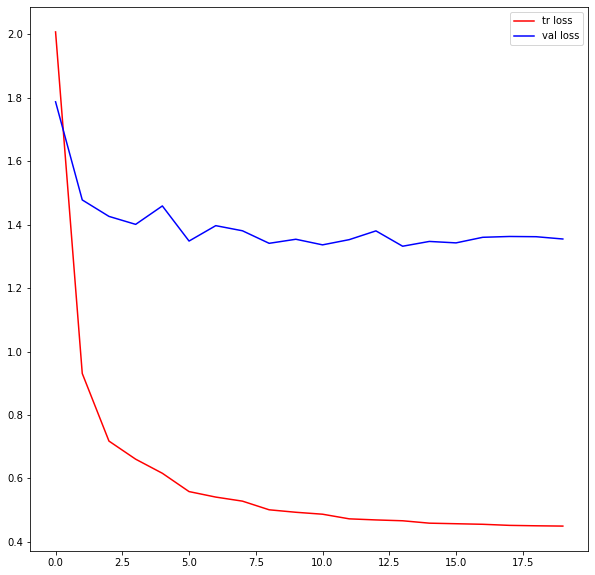

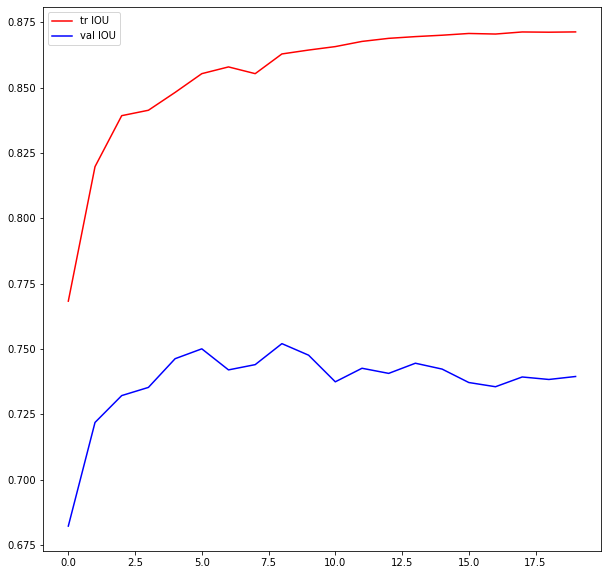

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(len(epoch_losses['train'])), epoch_losses['train'], color='r', label='tr loss')
ax.plot(range(len(epoch_losses['val'])), epoch_losses['val'], color='b', label='val loss')
plt.legend()
plt.show()
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(range(len(epoch_losses_iou_mean['train'])), epoch_losses_iou_mean['train'], color='r', label='tr IOU')
ax.plot(range(len(epoch_losses_iou_mean['val'])), epoch_losses_iou_mean['val'], color='b', label='val IOU')
plt.legend()

# Inference

In [46]:
cnn = VOT_baseline().to(device)
PATH = 'vot_baseline_13'

checkpoint = torch.load(PATH)
cnn.load_state_dict(checkpoint['cnn_state_dict'])

cnn.eval()

VOT_baseline(
  (c1): Sequential(
    (0): Conv2d(256, 2560, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (c2): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (c3): Sequential(
    (0): Conv2d(256, 5120, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (c4): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (bn_reg): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_cl): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (phi): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(384, 256, k

In [47]:
def get_subwindow_tracking(im, pos, model_sz, original_sz, avg_chans, out_mode='torch', new=False):

    if isinstance(pos, float):
        pos = [pos, pos]
    sz = original_sz
    im_sz = im.shape
    c = (original_sz+1) / 2

    context_xmin = round(pos[0] - c)  # floor(pos(2) - sz(2) / 2);
    context_xmax = context_xmin + sz - 1
    context_ymin = round(pos[1] - c)  # floor(pos(1) - sz(1) / 2);
    context_ymax = context_ymin + sz - 1

    left_pad = int(max(0., -context_xmin))
    top_pad = int(max(0., -context_ymin))
    right_pad = int(max(0., context_xmax - im_sz[1] + 1))
    bottom_pad = int(max(0., context_ymax - im_sz[0] + 1))

    context_xmin = context_xmin + left_pad
    context_xmax = context_xmax + left_pad
    context_ymin = context_ymin + top_pad
    context_ymax = context_ymax + top_pad
    r, c, k = im.shape
    # print(top_pad, bottom_pad, left_pad, right_pad)
    if any([top_pad, bottom_pad, left_pad, right_pad]):
        te_im = np.zeros((r + top_pad + bottom_pad, c + left_pad + right_pad, k), np.float)  # 0 is better than 1 initialization
        te_im[top_pad:top_pad + r, left_pad:left_pad + c, :] = np.array(im)
        # print(np.array(im).max(),np.array(im).min())
        # plt.imshow(np.array(im))
        plt.show()
        if top_pad:
            te_im[0:top_pad, left_pad:left_pad + c, :] = avg_chans
        if bottom_pad:
            te_im[r + top_pad:, left_pad:left_pad + c, :] = avg_chans
        if left_pad:
            te_im[:, 0:left_pad, :] = avg_chans
        if right_pad:
            te_im[:, c + left_pad:, :] = avg_chans
        im_patch_original = te_im[int(context_ymin):int(context_ymax + 1), int(context_xmin):int(context_xmax + 1), :]
    else:
        im_patch_original = im[int(context_ymin):int(context_ymax + 1), int(context_xmin):int(context_xmax + 1), :]
    
    
    # fig, ax = plt.subplots(figsize=(5,5))
    # plt.imshow(im_patch_original)
    # for idx, bbox in enumerate([bboxes_xywh_dict['Girl'][0]]):
    #     rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=3,
    #                               edgecolor='red', facecolor='none')
    #     ax.add_patch(rect)
    # plt.show()


    if not np.array_equal(model_sz, original_sz):
        im_patch = cv2.resize(np.array(im_patch_original), (model_sz, model_sz))  # zzp: use cv to get a better speed
    else:
        im_patch = im_patch_original
    
    transform = transforms.Compose([   
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                  ])
    
    return transform(im_patch).cpu().numpy()

In [93]:
bboxes_xywh_dict = {}
all_images_dict = {}

for i in folders_val+folders_tr:
    df = pd.read_csv(i+'/groundtruth_rect_new.txt', header=None, sep=',')
    bboxes_xywh_dict[i] = torch.Tensor(df.values).tolist()


    lol = pd.read_csv(i + '/img_files', header=None, sep=',').values.tolist()
    flat_list = [item for sublist in lol for item in sublist]
    all_images = []

    for img_file in flat_list:
        all_images.append(i+'/img/'+img_file)
    all_images_dict[i] = all_images

In [107]:

def create_priors_ssd300_cxywh():

    print("-----------------------create priors-------------------")
    anc_grids = [17]

    scales = [64]

    anc_ratios = [[1., 2., 3., 0.5, .333]
                  ]
    priors = []
    stride = 8
    for idx, anc_grid in enumerate(anc_grids):
        for i in range(int(anc_grid)):
            for j in range(int(anc_grid)):
                # cx, cy = ((stride-1)//2), ((stride-1)//2)
                cx, cy = 159//2, 159//2
                for a in anc_ratios[idx]:
                    priors.append([ cy+j*stride, cx+i*stride, scales[idx] * math.sqrt(a), scales[idx] / math.sqrt(a)])
                    
    priors = torch.FloatTensor(priors)
    return priors

ancs = create_priors_ssd300_cxywh()

origin = (287/2)

anchor = torch.cat((ancs[:, :2] - origin, ancs[:,2:]), dim=1).cpu().numpy()
anchor_old = create_priors_ssd300_cxywh().cpu().numpy()


iou = {}
def tracker_eval(x_crop, target_pos, target_sz, scale_z, original_img, bb_gt, index, folder):
    penalty_k = 0.10
    window_influence = 0.42
    lr = 0.01
    
    cnn.eval()
    score, delta = cnn(x_crop.unsqueeze(0), torch.Tensor(z_crop).unsqueeze(0).to(device)) 

    print(delta.shape, score.shape)
    delta = delta.squeeze(0).data.cpu().numpy()
    score = F.softmax(score.squeeze(0)).data[:, 1].cpu().numpy()
    
    idx = np.argmax(score)

    delta[:,0] = delta[:,0] * anchor[:, 2] + anchor[:, 0]
    delta[:,1] = delta[:,1] * anchor[:, 3] + anchor[:, 1]
    delta[:,2] = np.exp(delta[:,2]) * anchor[:, 2]
    delta[:,3] = np.exp(delta[:,3]) * anchor[:, 3]

    
    # compute change ratio (r, 1/r)
    def change(r):
        return np.maximum(r, 1./r)

    # compute size of larger area
    def sz(w, h):
        pad = (w + h) * 0.5
        sz2 = (w + pad) * (h + pad)
        return np.sqrt(sz2)
    # compute size of larger area, input []
    def sz_wh(wh):
        pad = (wh[0] + wh[1]) * 0.5
        sz2 = (wh[0] + pad) * (wh[1] + pad)
        return np.sqrt(sz2)

    ##############################################################
    # score => pscore => pscore+window
    # size penalty, delta is proposal
    s_c = change(sz(delta[:,2], delta[:,3]) / (sz_wh(target_sz)))  # scale penalty, bbox scale ratio(area ratio)
    r_c = change((target_sz[0] / target_sz[1]) / (delta[:,2] / delta[:,3]))  # ratio penalty

    penalty = np.exp(-1*(r_c * s_c) * penalty_k)
    print("value", score[idx])
    pscore = penalty * score
    print('best_pscore_id, after exp pen', np.argmax(pscore))
    print("value", pscore.max(), pscore[idx])

    # window float, 
    window = np.outer(np.hanning(17), np.hanning(17))
    # window = np.tile(window.flatten(), 5)
    window = torch.repeat_interleave(torch.Tensor(window), 5, 1).flatten().numpy()
    
    pscore = pscore * (1 - window_influence) + window * window_influence
    best_pscore_id = np.argmax(pscore)


    print("best_pscore_id, after cosine window (last)",best_pscore_id)
    target = delta[best_pscore_id, :] / scale_z
    target_sz = target_sz / scale_z
    lr = penalty[best_pscore_id] * score[best_pscore_id] * lr # a kind of score

    print("target_pos", target_pos, target_sz)
    # print("target ", target)
    res_x = target[0] + target_pos[0]
    res_y = target[1] + target_pos[1]

    print("previous ", (1 - lr), ", current ", lr)
    res_w = target_sz[0] * (1 - lr) + target[2] * lr
    res_h = target_sz[1] * (1 - lr) + target[3] * lr

    # res_w = target[2]
    # res_h = target[3]

    target_pos = np.array([res_x, res_y])
    target_sz = np.array([res_w, res_h])
    print("target_pos", target_pos, target_sz)
    print("target", target)

    ##### vis #################################################
    im_w, im_h, _ = original_img.shape
    # cxywh format
    res_x = min(im_w, target_pos[0])
    res_y = min(im_h, target_pos[1])
    res_w = min(im_w, target_sz[0])
    res_h = min(im_h, target_sz[1])

    print(res_x, res_y, res_w, res_h)
#     ress = torch.tensor([res_x-res_w/2, res_y-res_h/2, res_x+res_w/2, res_y+res_h/2]).unsqueeze(0)
#     bbgt = torch.tensor([bb_gt[0], bb_gt[1], bb_gt[0] + bb_gt[2], bb_gt[1] + bb_gt[3]]).unsqueeze(0)
    
#     jacc = get_jaccard_tensor1(ress, bbgt)
#     iou[folder].append(jacc.item())

  
    original_img = transforms.ToPILImage()(original_img.permute(2,0,1))
    draw = ImageDraw.Draw(original_img)
    draw.rectangle(xy = [res_x-res_w/2, res_y-res_h/2, res_x+res_w/2, res_y+res_h/2], outline='red')
    draw.rectangle(xy = [bb_gt[0], bb_gt[1], bb_gt[0] + bb_gt[2], bb_gt[1] + bb_gt[3]], outline='green')
    
    # original_img.save('Basketball_p20_ar/{:04d}.jpg'.format(index+1))
    original_img.save('Results/{:04d}.jpg'.format(index+1))

    return target_pos, target_sz, score[best_pscore_id]




-----------------------create priors-------------------
-----------------------create priors-------------------


In [103]:
folders_val

['Vase',
 'BlurFace',
 'Coke',
 'Toy',
 'DragonBaby',
 'David2',
 'FaceOcc1',
 'Surfer']

In [104]:
for folder in folders_val:
        iou[folder] = []
        target_sz = bboxes_xywh_dict[folder][0][-2:]
        p_factor = 1.
        wc_z = target_sz[0] + 0.5 * np.sum(target_sz) * p_factor
        hc_z = target_sz[1] + 0.5 * np.sum(target_sz) * p_factor
        original_sz = round(np.sqrt(wc_z * hc_z))
        pos = bboxes_xywh_dict[folder][0]
        target_pos = [pos[0]+pos[2]/2., pos[1]+pos[3]/2.]
        z_img = Image.open(all_images_dict[folder][0]).convert('RGB')

        z_crop = get_subwindow_tracking(transforms.ToTensor()(z_img).permute(1,2,0),\
                               target_pos + target_sz,\
                               159,\
                               original_sz,\
                               transforms.ToTensor()(z_img).permute(1,2,0).mean(axis=(0,1)))



        for index in range(1,len(all_images_dict[folder]))):
            wc_z = target_sz[0] + 0.5 * np.sum(target_sz)*p_factor
            hc_z = target_sz[1] + 0.5 * np.sum(target_sz)*p_factor
            s_z = np.sqrt(wc_z * hc_z)
            scale_z = 159 / s_z #scale ratio of template
            d_search = (287 - 159) / 2
            pad = d_search / scale_z
            s_x = s_z + 2 * pad

            # index = 10
            x_img = Image.open(all_images_dict[folder][index]).convert('RGB')
            x_crop = get_subwindow_tracking(transforms.ToTensor()(x_img).permute(1,2,0),\
                                            target_pos ,\
                                            287, s_x,\
                                            transforms.ToTensor()(x_img).permute(1,2,0).mean(axis=(0,1))
                                            )
            print(index)
            target_pos, target_sz, score = tracker_eval(torch.Tensor(x_crop).cuda(), target_pos, np.array(target_sz) * scale_z, scale_z,\
                                                        transforms.ToTensor()(x_img).permute(1,2,0), bboxes_xywh_dict[folder][index], index, folder)

1
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.999561
best_pscore_id, after exp pen 803
value 0.88305646 0.8702383
best_pscore_id, after cosine window (last) 724
target_pos [161.5, 119.5] [45. 59.]
previous  1.0 , current  0.0
target_pos [160.510911 115.582847] [45. 59.]
target [-0.989089 -3.917153 42.108273 49.584824]
160.51091086864471 115.58284735679626 45.0 59.0
2
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.99657345
best_pscore_id, after exp pen 803
value 0.8774535 0.87425
best_pscore_id, after cosine window (last) 721
target_pos [160.510911 115.582847] [45. 59.]
previous  1.0 , current  0.0
target_pos [159.210431 119.248584] [45. 59.]
target [-1.30048   3.665736 42.92353  48.38739 ]
159.210431098938 119.24858355522156 45.0 59.0
3
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.99897826
best_pscore_id, after exp pen 634
value 0.8833012 0.87565035
best_pscore_id, after cosine window (last) 723
target_pos [159.210431 119.248584] [45. 59.]
previous

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


value 0.9990538
best_pscore_id, after exp pen 713
value 0.87847376 0.8676849
best_pscore_id, after cosine window (last) 721
target_pos [154.039341 111.11268 ] [45. 59.]
previous  1.0 , current  0.0
target_pos [152.015828 113.114263] [45. 59.]
target [-2.023512  2.001583 42.841568 48.82595 ]
152.01582826673985 113.11426344513893 45.0 59.0
10
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.99913496
best_pscore_id, after exp pen 713
value 0.8823094 0.8710435
best_pscore_id, after cosine window (last) 721
target_pos [152.015828 113.114263] [45. 59.]
previous  1.0 , current  0.0
target_pos [150.813406 115.078306] [45. 59.]
target [-1.202422  1.964042 42.901855 48.88631 ]
150.81340612471104 115.07830587029457 45.0 59.0
11
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.99841464
best_pscore_id, after exp pen 803
value 0.8813358 0.8707323
best_pscore_id, after cosine window (last) 721
target_pos [150.813406 115.078306] [45. 59.]
previous  1.0 , current  0.0
target_pos [149.

In [105]:
for k in iou.keys():
    print(k, torch.tensor(iou[k]).mean())

Vase tensor(0.3027)
BlurFace tensor(0.7216)
Coke tensor(0.4748)
Toy tensor(0.2008)
DragonBaby tensor(0.1036)
David2 tensor(0.6344)
FaceOcc1 tensor(0.6930)
Surfer tensor(0.4763)


In [100]:
for k in iou.keys():
    print(k, torch.tensor(iou[k]).mean())

Coke tensor(0.4239)
Vase tensor(0.2499)
BlurFace tensor(0.4770)
Toy tensor(0.2754)
DragonBaby tensor(0.1049)
David2 tensor(0.4947)
FaceOcc1 tensor(0.4804)
Surfer tensor(0.3696)


Could be see from above results that on valid dataset, performs best on David2 video, and worst on DragnBaby

In [123]:
! rm -r Results/
! mkdir Results

folder = 'Woman'

target_sz = bboxes_xywh_dict[folder][0][-2:]
p_factor = 1.
wc_z = target_sz[0] + 0.5 * np.sum(target_sz) * p_factor
hc_z = target_sz[1] + 0.5 * np.sum(target_sz) * p_factor
original_sz = round(np.sqrt(wc_z * hc_z))
pos = bboxes_xywh_dict[folder][0]
target_pos = [pos[0]+pos[2]/2., pos[1]+pos[3]/2.]
z_img = Image.open(all_images_dict[folder][0]).convert('RGB')

z_crop = get_subwindow_tracking(transforms.ToTensor()(z_img).permute(1,2,0),\
                       target_pos + target_sz,\
                       159,\
                       original_sz,\
                       transforms.ToTensor()(z_img).permute(1,2,0).mean(axis=(0,1)))



for index in range(1,len(all_images_dict[folder])):
    wc_z = target_sz[0] + 0.5 * np.sum(target_sz)*p_factor
    hc_z = target_sz[1] + 0.5 * np.sum(target_sz)*p_factor
    s_z = np.sqrt(wc_z * hc_z)
    scale_z = 159 / s_z #scale ratio of template
    d_search = (287 - 159) / 2
    pad = d_search / scale_z
    s_x = s_z + 2 * pad

    # index = 10
    x_img = Image.open(all_images_dict[folder][index]).convert('RGB')
    x_crop = get_subwindow_tracking(transforms.ToTensor()(x_img).permute(1,2,0),\
                                    target_pos ,\
                                    287, s_x,\
                                    transforms.ToTensor()(x_img).permute(1,2,0).mean(axis=(0,1))
                                    )
    print(index)
    target_pos, target_sz, score = tracker_eval(torch.Tensor(x_crop).cuda(), target_pos, np.array(target_sz) * scale_z, scale_z,\
                                                transforms.ToTensor()(x_img).permute(1,2,0), bboxes_xywh_dict[folder][index], index, folder)

1
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.9999964
best_pscore_id, after exp pen 633
value 0.8951956 0.889716
best_pscore_id, after cosine window (last) 723
target_pos [223.5, 168.5] [21. 95.]
previous  0.9911028397083282 , current  0.008897160291671754
target_pos [220.74458  167.567542] [20.975424 94.93749 ]
target [-2.75542  -0.932458 18.237814 87.974144]
220.7445797920227 167.56754225492477 20.97542438795404 94.93748983282106
2
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.9999628
best_pscore_id, after exp pen 553
value 0.89537585 0.8932851
best_pscore_id, after cosine window (last) 723
target_pos [220.74458  167.567542] [20.975424 94.93749 ]
previous  0.9910671490430832 , current  0.008932850956916809
target_pos [220.203127 166.271816] [20.955055 94.863332]
target [-0.541453 -1.295726 18.695127 86.635765]
220.20312666893005 166.27181631326675 20.955054835601928 94.86333176288021
3
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.99982136
best_p

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


target [ 0.894944  0.230036 18.922419 86.208206]
217.37265929579735 163.58955878019333 20.861634197137104 94.4812018005687
8
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.9999883
best_pscore_id, after exp pen 558
value 0.8956252 0.8900796
best_pscore_id, after cosine window (last) 724
target_pos [217.372659 163.589559] [20.861634 94.481202]
previous  0.9910757750272751 , current  0.008924224972724914
target_pos [219.210351 163.982222] [20.840172 94.405828]
target [ 1.837691  0.392663 18.45668  86.03521 ]
219.2103507220745 163.98222202062607 20.840171847490847 94.40582786655058
9
torch.Size([1, 1445, 4]) torch.Size([1, 1445, 2])
value 0.99999106
best_pscore_id, after exp pen 468
value 0.89398617 0.8901318
best_pscore_id, after cosine window (last) 723
target_pos [219.210351 163.982222] [20.840172 94.405828]
previous  0.9910986822843552 , current  0.008901317715644837
target_pos [219.242733 161.043028] [20.815869 94.332342]
target [ 3.238262e-02 -2.939194e+00  1.810990e+01  8

In [125]:
! echo 'y' | ffmpeg -framerate 25 -i Results/%4d.jpg  -c:v libx264 -profile:v high -crf 20 -pix_fmt yuv420p Woman.mp4
# -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2"


ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [80]:
# ! echo 'y' | sudo apt-get install ffmpeg

In [126]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="Woman.mp4" type="video/mp4">
    </video>
""")

In [122]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="Surfer.mp4" type="video/mp4">
    </video>
""")

In [119]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="FaceOcc1.mp4" type="video/mp4">
    </video>
""")

In [116]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="Coke.mp4" type="video/mp4">
    </video>
""")

In [113]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="DragonBaby.mp4" type="video/mp4">
    </video>
""")

In [110]:
from IPython.display import HTML

HTML("""
    <video alt="test" controls>
        <source src="David2.mp4" type="video/mp4">
    </video>
""")

In [ ]:
# if the bb during inference is slightly off the target, then for later frames this gets amplified, 
# this the reason that valid results are not very good because the model needs to have high accuracy in the offline
# training. I have trained for 13 epochs only and so this is expected.